In [1]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [3]:
train_data_dir = r'D:\Cologne\Sample DataSet 8\train'
test_data_dir = r'D:\Cologne\Sample DataSet 8\test'

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.4,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.4,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 6000 files belonging to 2 classes.
Using 3600 files for training.
Found 6000 files belonging to 2 classes.
Using 2400 files for validation.
Found 1470 files belonging to 2 classes.


In [4]:
class_names = train_data.class_names
class_names

['defective', 'non-defective']

In [5]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


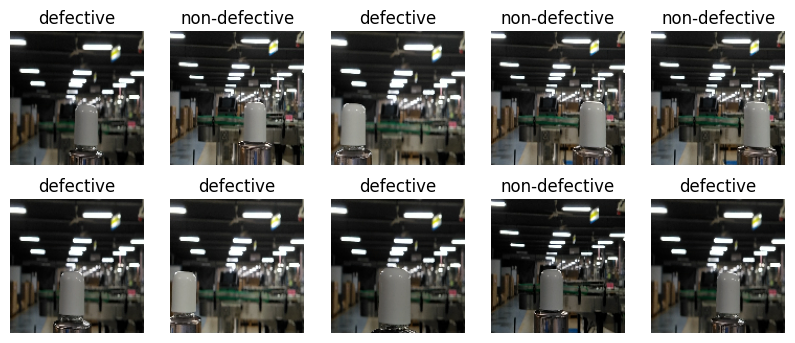

In [6]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [7]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [8]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(128,128,3),
                                                           weights="imagenet",
                                                           pooling='max')
for layer in pretrained_model.layers:
        layer.trainable=False

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(128, 128, 3)))

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

c:\Users\malin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,894,681 (79.71 MB)

 Trainable params: 33,201 (129.69 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [12]:

start_time = time.time()

history = model.fit(train_data,
                    epochs=10,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 100s 854ms/step - accuracy: 0.9614 - loss: 0.1276 - val_accuracy: 1.0000 - val_loss: 4.4798e-04
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 722ms/step - accuracy: 1.0000 - loss: 5.0584e-04 - val_accuracy: 1.0000 - val_loss: 1.4733e-04
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 727ms/step - accuracy: 1.0000 - loss: 1.8360e-04 - val_accuracy: 1.0000 - val_loss: 8.2400e-05
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 722ms/step - accuracy: 1.0000 - loss: 2.4010e-04 - val_accuracy: 1.0000 - val_loss: 4.5785e-05
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 84s 741ms/step - accuracy: 1.0000 - loss: 8.0348e-05 - val_accuracy: 1.0000 - val_loss: 2.9181e-05
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 84s 747ms/step - accuracy: 1.0000 - loss: 4.3043e-05 - val_accuracy: 1.0000 - val_loss: 2.2483e-05
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 711ms/step - accuracy: 1.0000 - loss: 3.7274e-05 - val_accuracy: 1.0000 - val_loss: 1.6984e-05
Epoch 8/10
113/113 ━━━━━━━━━━━

In [13]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')


Total time for training 839.718 seconds


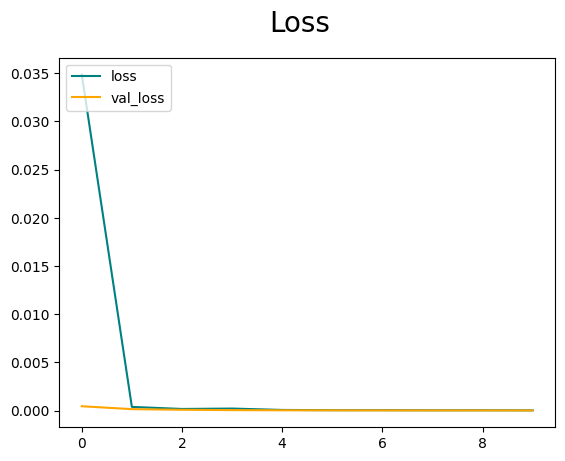

In [14]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

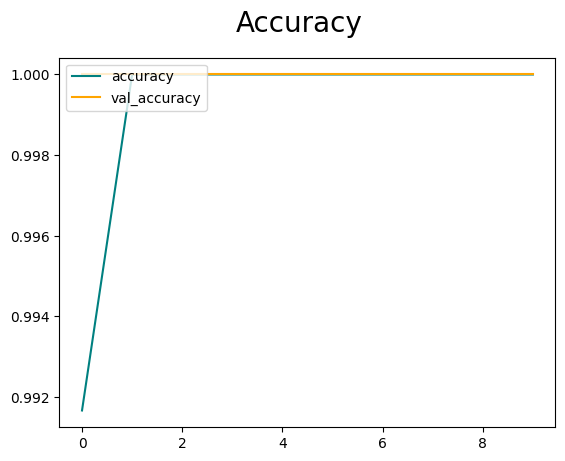

In [15]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [16]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [17]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [18]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [19]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [20]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [21]:
import cv2

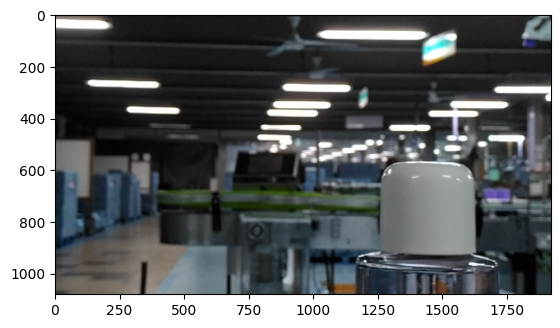

In [22]:
img = cv2.imread(r'D:\Cologne\Sample DataSet 8\test\non-defective\Sequence 01_12282.jpg')
plt.imshow(img)
plt.show()

In [23]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [24]:
scaled_image.shape

TensorShape([128, 128, 3])

In [25]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [26]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [27]:
yhat

array([[0.9999991]], dtype=float32)

In [28]:
class_names

['defective', 'non-defective']

In [29]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

non-defective


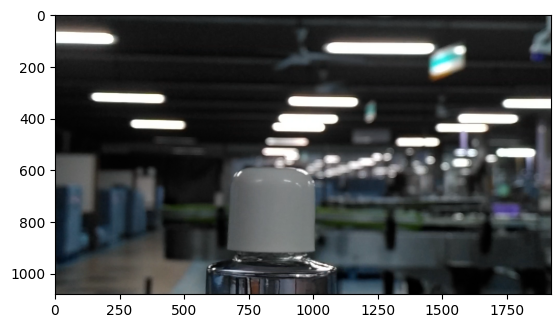

In [30]:
img = cv2.imread(r'D:\Cologne\Sample DataSet 8\test\defective\Sequence 011454.jpg')
plt.imshow(img)
plt.show()

In [31]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

scaled_image.shape

TensorShape([128, 128, 3])

In [32]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [33]:

yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [34]:
yhat

array([[0.00104895]], dtype=float32)

In [35]:
class_names

['defective', 'non-defective']

In [36]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

defective


In [37]:
model.save('my_model_6.0.h5') # saves the model in h5 format


In [38]:
import cv2
from IPython.display import display, Image
import os

In [39]:
for i in range(5):  # Test camera indices 0 through 4
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        print(f"Camera {i} is available")
        cap.release()
    else:
        print(f"Camera {i} is not available")


Camera 0 is available
Camera 1 is available
Camera 2 is not available
Camera 3 is not available
Camera 4 is not available


import cv2

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)  # Use DirectShow backend
if not cap.isOpened():
    print("Camera not accessible")
else:
    print("Camera accessible")


import cv2

print("Testing cameras with DirectShow backend...")
for i in range(5):  # Test indices 0 to 4
    cap = cv2.VideoCapture(i, cv2.CAP_DSHOW)
    if cap.isOpened():
        print(f"Camera {i} is available")
        cap.release()
    else:
        print(f"Camera {i} is not available")


import cv2

# Replace the index '1' with the correct index for Iriun Webcam (use the enumeration test above)
cap = cv2.VideoCapture(1, cv2.CAP_DSHOW)

if not cap.isOpened():
    print("Unable to access the camera")
else:
    print("Camera is accessible")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        # Display the video feed
        cv2.imshow("Iriun Webcam", frame)

        # Press 'ESC' to exit
        if cv2.waitKey(1) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()


Press 'Space' to capture the photo or 'ESC' to exit.
Photo saved to captured_image.jpg


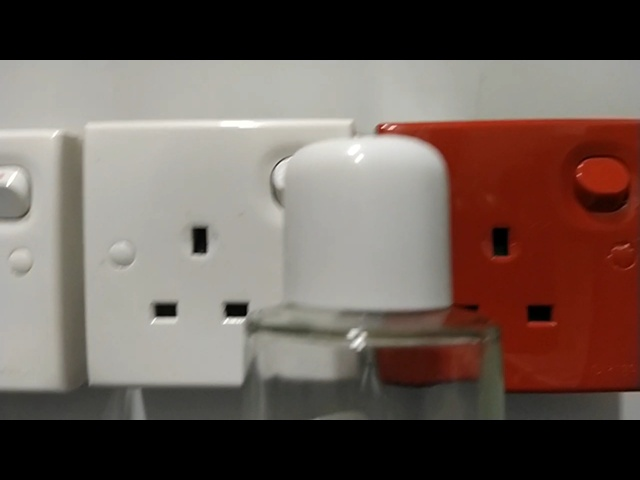

In [40]:
def capture_photo(filename='photo.jpg'):
    """
    Captures an image from the webcam and saves it to a file.
    
    Args:
        filename (str): The file path where the image will be saved.
        
    Returns:
        str: The filename of the captured photo.
    """
    # Open webcam
    cap = cv2.VideoCapture(1)

    if not cap.isOpened():
        raise IOError("Cannot access the webcam")

    print("Press 'Space' to capture the photo or 'ESC' to exit.")

    while True:
        # Read frame from the webcam
        ret, frame = cap.read()
        if not ret:
            raise IOError("Failed to read from the webcam")

        # Show the live video feed
        cv2.imshow("Webcam - Press Space to Capture", frame)

        # Wait for key press
        key = cv2.waitKey(1)

        if key == 27:  # ESC key to exit
            print("Exiting without saving...")
            break
        elif key == 32:  # Space key to capture photo
            cv2.imwrite(filename, frame)  # Save the captured image
            print(f"Photo saved to {filename}")
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()

    # Return the filename
    return filename

# Usage
try:
    filename = capture_photo("captured_image.jpg")
    display(Image(filename))  # Display the captured image in Jupyter
except Exception as e:
    print(f"Error: {e}")

In [43]:
img = cv2.imread(filename)

resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

scaled_image.shape
  
np.expand_dims(scaled_image, 0).shape

yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [44]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

non-defective
